# NLP Testing

In [55]:
import numpy as np
import re
import pandas as pd
import text_utils

Download dictionaries

In [56]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/u0784726/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/u0784726/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/u0784726/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/u0784726/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/u0784726/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /Users/u0784726/nltk_d

True

In [57]:
dat = pd.read_csv("../datafiles/twitter_sentiment_data.csv")
dat.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


Here's a plan:

- Basics: tokenization, corpuses
- Lemmatization
- Stopwords
- Other cleaning (URLs, etc)

- Embeddings
  - Onehot
  - Word2vec

- Sentiments
- Clustering
- ML model (RF or keras)

## Text processing

In [58]:
tweet = dat.message[1]
print(tweet)

RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦


### Cleaning

General cleaning 

- remove urls 
- remove `RT` tag for retweets
- remove user names `@...`

In [59]:
import re

In [60]:
tweet = re.sub(r"https?://\S+", "", tweet)
print(tweet)

RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change  httÃ¢â‚¬Â¦


In [61]:
tweet = re.sub(r"RT ", "", tweet)  # Remove RT tag
print(tweet)

@NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change  httÃ¢â‚¬Â¦


In [62]:
tweet = re.sub(r'@\w+', '', tweet)
print(tweet)

: Watch #BeforeTheFlood right here, as  travels the world to tackle climate change  httÃ¢â‚¬Â¦


Next we need to expand hashtags

In [63]:
tweet = text_utils.expand_hashtags(tweet)
print(tweet)

: Watch Before The Flood right here, as  travels the world to tackle climate change  httÃ¢â‚¬Â¦


Remove punctuation and extra spaces

In [64]:
tweet = re.sub("[^a-zA-Z]+", " ", tweet)
tweet = re.sub(r"\s+", " ", tweet)
print(tweet)

 Watch Before The Flood right here as travels the world to tackle climate change htt 


Remove stopwords (common words eg. and, the ...)

In [65]:
tweet = text_utils.remove_stopwords(tweet).lower() 
print(tweet)

watch flood right travels world tackle climate change htt


Match words
- Show stemming
- Lemmatization

In [87]:
from nltk.stem import PorterStemmer
# Initialize Python porter stemmer
ps = PorterStemmer()
# Example inflections to reduce
example_words = ["program","programming","programer","programs","programmed"]
for word in example_words:
    print(f"{word}: {ps.stem(word)}")

program: program
programming: program
programer: program
programs: program
programmed: program


In [91]:
ps.stem("climate")

'climat'

In [92]:
text_utils.lemmatize("I saw a rabbit") 

'I see a rabbit'

In [94]:
text_utils.lemmatize("I sawed a plank") 

'I saw a plank'

If we do this now with our tweet, you'll see that it shortens `travels` to `travel`. 

In [95]:
tweet = text_utils.lemmatize(tweet) 
print(tweet)

watch flood right travel world tackle climate change htt


Putting it all together

In [67]:
text_utils.text_clean(dat.message[1])

'watch flood right travel world tackle climate change htt'

Now map across all tweets

In [68]:
dat['text_clean'] = dat['message'].map(text_utils.text_clean)
dat['text_len'] = dat['text_clean'].map(text_utils.text_len)
dat = dat[dat['text_len'] > 32]

display(dat)

,sentiment,message,tweetid,text_clean,text_len
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840,climate change interesting hustle global warmi...,78
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,watch flood right travel world tackle climate ...,56
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,fabulous leonardo di caprio film climate chang...,67
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,watch amazing documentary leonardodicaprio cli...,63
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153,pranita biswasi lutheran odisha give testimony...,88
...,...,...,...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464,dear yeah right human mediated climate change ...,66
43939,1,What will your respective parties do to preven...,791316857403936768,respective party prevent climate change globally,48
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249,un poll show climate change lowest global conc...,50
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537,still q believe gif taehyung save human race s...,82


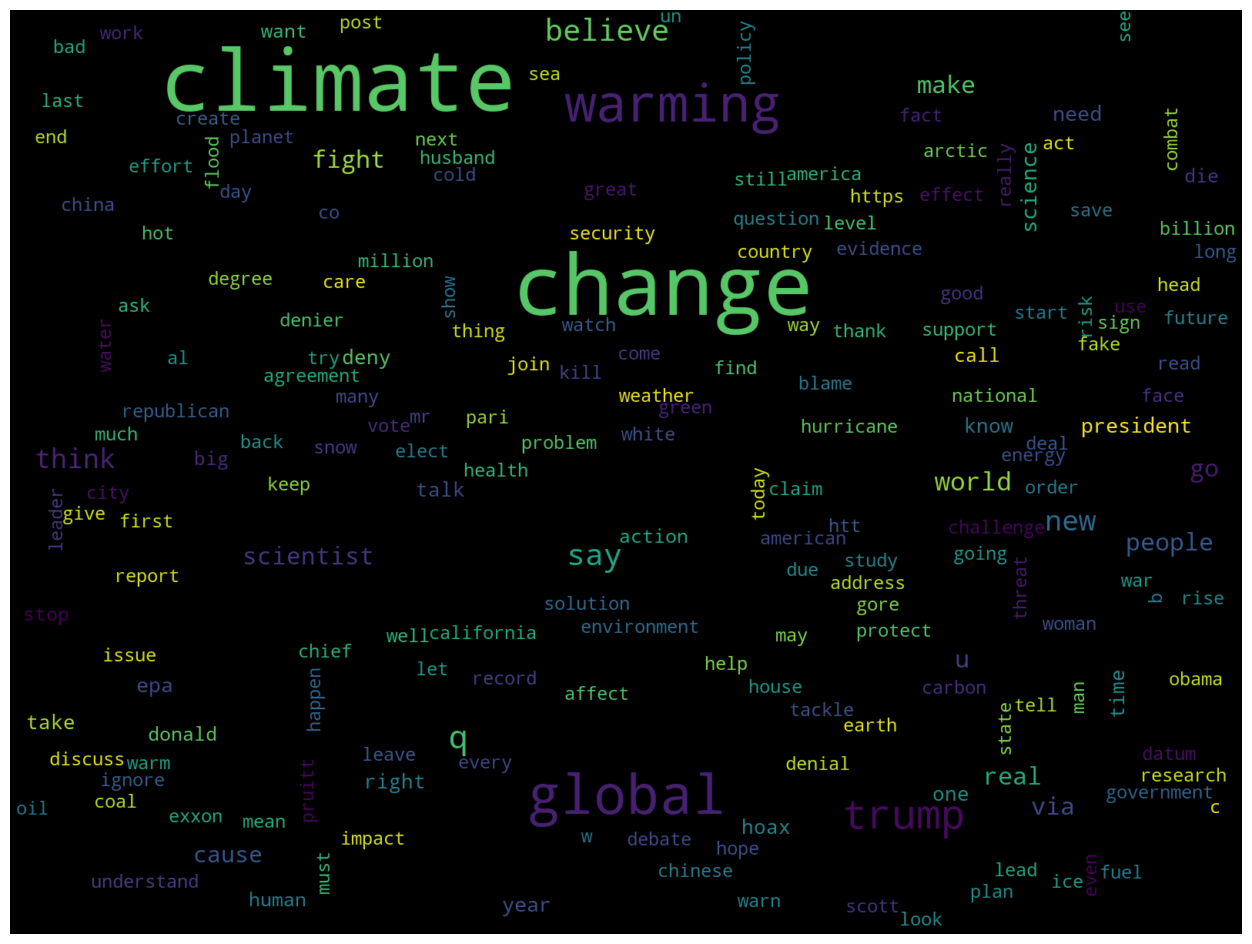

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  

#def draw_cloud(column: pd.Series, stopwords=None):
all_words = ' '.join([text for text in dat['text_clean']]) 
    
wordcloud = WordCloud(width=1600, height=1200, random_state=42, 
max_font_size=110, collocations=False).generate(all_words) 
plt.figure(figsize=(16, 12)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

### Sentiment analysis

In [70]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [71]:
analyzer.polarity_scores("I'm happy")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [72]:
analyzer.polarity_scores("I'm scared")

{'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.4404}

In [98]:
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

dat['sentiment'] = dat['text_clean'].map(get_sentiment)

(array([18403.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 23025.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

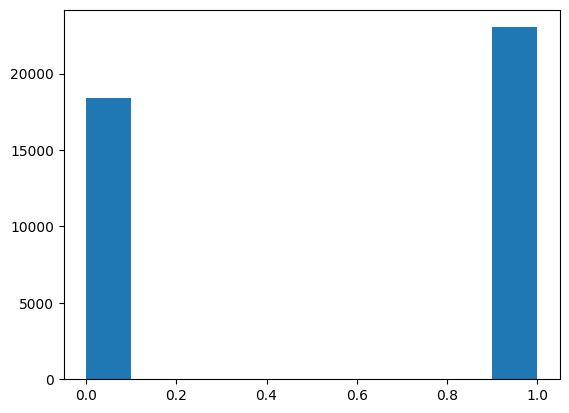

In [100]:
plt.hist(dat['sentiment'])

### Tokenization

In [14]:
from nltk.tokenize import TweetTokenizer

tokens = TweetTokenizer().tokenize(tweet)
print(tokens)

['watch', 'flood', 'right', 'travel', 'world', 'tackle', 'climate', 'change', 'htt']


In [ ]:
tweet

### Split hashtags